### Probability
  
Probability does not tell us `exactly` what will happen, it is just a guide.   
When a coin is tossed, probability says that heads have a 50% chance, so we can `expect` 50 Heads.   
When we actually try it we might get 48, or 55 heads ... or `anything` really.  
But in `most` cases it will be a number near 50.  

$ P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}} $  

In [31]:
import random

# Function to simulate coin toss
def toss_coin():
    heads_count = 0
    for _ in range(100):
        if random.choice(['H', 'T']) == 'H':
            heads_count += 1
    return heads_count

print(f"Tossing a coin 100 times, repeated 10 times:")
for i in range(10):
    heads = toss_coin()
    print(f"Experiment {i+1}: Number of heads: {heads}")

print(f"{'Outcome':<10} Probability")
D = {'H': 1/2, 'T': 1/2}
for outcome, p in D.items():
    print(f"{outcome:<10} {p:.2f}")

Tossing a coin 100 times, repeated 10 times:
Experiment 1: Number of heads: 46
Experiment 2: Number of heads: 51
Experiment 3: Number of heads: 53
Experiment 4: Number of heads: 54
Experiment 5: Number of heads: 54
Experiment 6: Number of heads: 39
Experiment 7: Number of heads: 61
Experiment 8: Number of heads: 65
Experiment 9: Number of heads: 51
Experiment 10: Number of heads: 53
Outcome    Probability
H          0.50
T          0.50


### Probability Distribution

Random `variables` are characteristics that you can observe, but you don't control them.  
Probability distribution is a `function` that describes the probabilities for all outcomes of random variable.   

In [34]:
from random import choices

# Define the probability distribution of a six-sided die
D = {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

print(f"{'Outcome':<10} Probability")
for outcome, p in D.items():
    print(f"{outcome:<10} {p:.2f}")

# Simulate rolling the die
outcomes, probabilities = zip(*D.items())
outcome = choices(outcomes)[0]
print(f"You rolled a {outcome}!")

Outcome    Probability
1          0.17
2          0.17
3          0.17
4          0.17
5          0.17
6          0.17
You rolled a 4!


### Histograms

Probability distributions are similar to histograms, except that the `focus` is on probabilities of the outcomes.  
In histograms we are displaying the `properties` of distributions (shape, center, spread).   

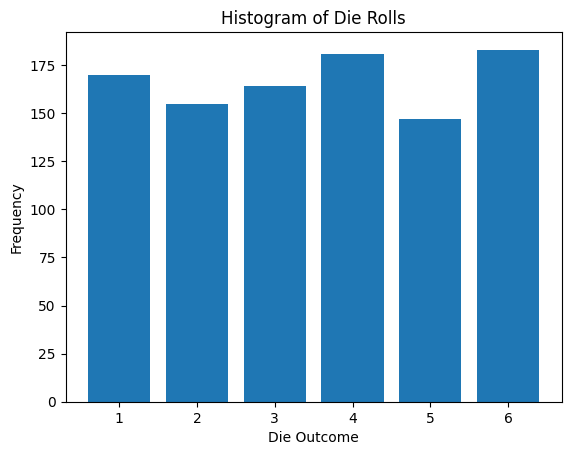

In [58]:
import matplotlib.pyplot as plt
from random import choices

# Define the probability distribution of a six-sided die
D = {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

# Simulate rolling the die 1000 times
num_rolls = 1000
rolls = choices(list(D.keys()), weights=D.values(), k=num_rolls)

# Create a histogram
plt.hist(rolls, bins=range(1, 8), align='left', rwidth=0.8)
plt.xlabel('Die Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Die Rolls')
plt.xticks(range(1, 7))
plt.show()


### Discrete Distributions

Discrete probability functions have only `distinct` values.  
For `example`, coin tosses and counts of events are discrete functions, there are no in-between values.  

In [41]:
# Household Car Ownership / Hypothetical probabilities
counts = ['0 cars', '1 car', '2 cars', '3+ cars']
probabilities = [0.1, 0.4, 0.3, 0.2]  

# Output the table
print(f"{'Outcome':<10} Probability")
for count, p in zip(counts, probabilities):
    print(f"{count:<10} {p:.2f}")

Outcome    Probability
0 cars     0.10
1 car      0.40
2 cars     0.30
3+ cars    0.20


### Binominal Distributions

Binary distributions occur when you can place an observation into only `two` categories.  
Assume we're playing a `game` where rolling a 6 is very advantageous.  
In this scenario, rolling a 6 is `binary` because an observation can be either 6 or not a 6.      

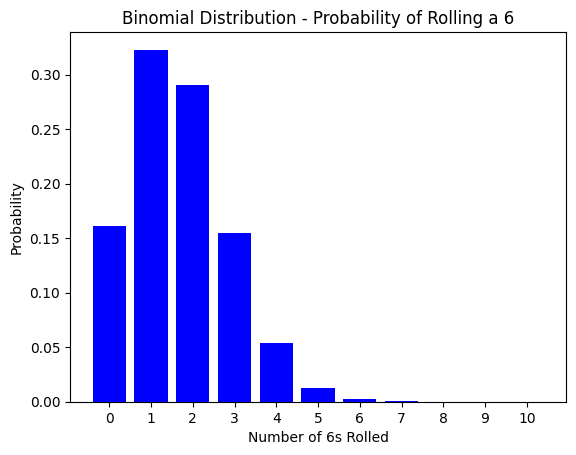


The highest probability is (0.32) corresponding with 1 time(s) 6s.
There is a 32.30% chance of rolling a 6 exactly 1 time(s) in 10 rolls.
There is a 16.14% chance of rolling no 6s.
There is a 0.22% chance of rolling 7 time(s) 6s.



In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

p = 1/6  # Probability of success (rolling a 6)
n = 10   # Number of trials (rolling a die 10 times)

# Probability of getting each possible number of 6's (from 0 to 10)
x = np.arange(0, n+1) # Possible numbers of successes (0 through 10)
probabilities = binom.pmf(x, n, p)  # pmf is the probability mass function for the binomial distribution

# Plotting the binomial distribution
plt.bar(x, probabilities, color='blue')
plt.title('Binomial Distribution - Probability of Rolling a 6')
plt.xlabel('Number of 6s Rolled')
plt.ylabel('Probability')
plt.xticks(x)
plt.show()

# Display the binomial distribution
print(f"""
The highest probability is ({max(probabilities):.2f}) corresponding with {np.argmax(probabilities)} time(s) 6s.
There is a {probabilities[1]:.2%} chance of rolling a 6 exactly {np.argmax(probabilities)} time(s) in 10 rolls.
There is a {probabilities[0]:.2%} chance of rolling no 6s.
There is a {probabilities[6]:.2%} chance of rolling 7 time(s) 6s.
""")

### Geometric Distribution

Use geometric distribution when you want to see the likelihood of the event `first` occuring during a specific trial.  
For instance, the likelihood of rolling the first 6 on the `third` roll is 0.11.  

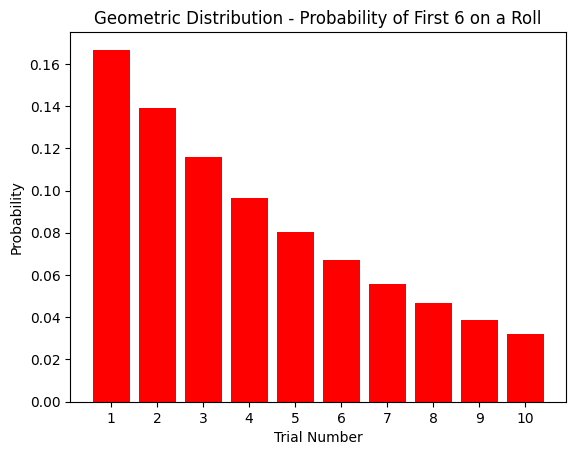

The probability of rolling the first 6 on the 3rd roll is approximately 0.12


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

p = 1/6  # Probability of success (rolling a 6)

# Define the number of trials for the geometric distribution
trials = np.arange(1, 11)  # Look at first 10 trials

# Calculate the probability mass function for the geometric distribution
probabilities = geom.pmf(trials, p)

# Plot the geometric distribution
plt.bar(trials, probabilities, color='red')
plt.title('Geometric Distribution - Probability of First 6 on a Roll')
plt.xlabel('Trial Number')
plt.ylabel('Probability')
plt.xticks(trials)
plt.show()

# Display the probability of first 6 on the 3rd roll
print(f"The probability of rolling the first 6 on the 3rd roll is approximately {probabilities[2]:.2f}")


### References

https://www.amazon.com/Introduction-Statistics-Intuitive-Analyzing-Discoveries/dp/1735431109
https://www.mathsisfun.com/data/probability.html